In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import re
from matplotlib import pyplot as plt
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
import unicodedata

In [40]:
import warnings

warnings.filterwarnings('ignore')

In [15]:
#pip install --upgrade language-check

  Using cached language-check-1.1.tar.gz (33 kB)
  Running setup.py clean for language-check
Failed to build language-check
    Running setup.py install for language-check: started
    Running setup.py install for language-check: finished with status 'error'



  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\msinan\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\msinan\\AppData\\Local\\Temp\\pip-install-qiale806\\language-check\\setup.py'"'"'; __file__='"'"'C:\\Users\\msinan\\AppData\\Local\\Temp\\pip-install-qiale806\\language-check\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\msinan\AppData\Local\Temp\pip-wheel-ipao5660'
       cwd: C:\Users\msinan\AppData\Local\Temp\pip-install-qiale806\language-check\
  Complete output (35 lines):
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "C:\Users\msinan\AppData\Local\Temp\pip-install-qiale806\language-check\setup.py", line 595, in <module>
      sys.exit(main())
    File "C:\Users\msinan\AppData\Local\Temp\pip-install-qiale806\language-che

In [20]:
! sudo apt install openjdk-8-jdk
! sudo update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java

!pip install language-check
!pip install pycontractions

"""
ain't -> am not
ain't -> are not
ain't -> is not
ain't -> has not
ain't -> have not
"""


'sudo' is not recognized as an internal or external command,
operable program or batch file.
'sudo' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
pip install --upgrade language-check
pip install --upgrade language-check

In [ ]:
pip install autocorrect

In [6]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msinan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\msinan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\msinan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
column_names = ['sentiment', 'text']
df = pd.read_csv('yelp/test.csv', names=column_names,index_col=0)
#df['Sentiment'].replace({1: 0, 2: 1}, inplace=True)
print(df.head())

                                                        text
sentiment                                                   
2          Contrary to other reviews, I have zero complai...
1          Last summer I had an appointment to get new ti...
2          Friendly staff, same starbucks fair you get an...
1          The food is good. Unfortunately the service is...
2          Even when we didn't have a car Filene's Baseme...


In [28]:
column_names = ['sentiment', 'text']
df = pd.read_csv('yelp/train.csv', names=column_names,index_col=0)
#df['Sentiment'].replace({1: 0, 2: 1}, inplace=True)
print(df.head())

                                                        text
sentiment                                                   
2          Contrary to other reviews, I have zero complai...
1          Last summer I had an appointment to get new ti...
2          Friendly staff, same starbucks fair you get an...
1          The food is good. Unfortunately the service is...
2          Even when we didn't have a car Filene's Baseme...


In [8]:
df

,text
sentiment,
2,"Contrary to other reviews, I have zero complai..."
1,Last summer I had an appointment to get new ti...
2,"Friendly staff, same starbucks fair you get an..."
1,The food is good. Unfortunately the service is...
2,Even when we didn't have a car Filene's Baseme...
...,...
1,If I could give 0...I would. Don't do it.
2,Items Selected:\nChocolate Cinnamon Horn\nSmal...
1,Expensive lunch meals. Fried pickles were goo...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38000 entries, 2 to 1
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    38000 non-null  object
dtypes: object(1)
memory usage: 593.8+ KB


In [10]:
df.describe()

,text
count,38000
unique,38000
top,Visited Pittsburgh for a wedding and needed to...
freq,1


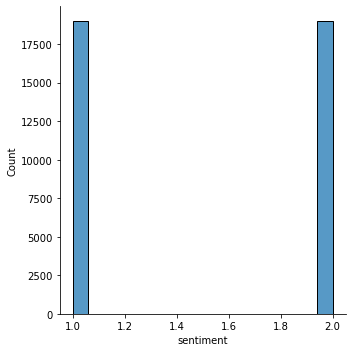

In [11]:
import seaborn as sns
sns.displot(df, x="sentiment")

In [12]:
url = r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))'''

In [13]:
#for text

df.text = df.text.map(lambda x:str(x).lower()) #lower case
df.text = df.text.map(lambda x:re.sub(r"\b[^\s]+@[^\s]+[.][^\s]+\b", "", x)) #email
df.text = df.text.map(lambda x:re.sub(url, "", x)) #url
df.text = df.text.map(lambda x:re.sub(r'[^a-zA-z.,!?/:;\"\'\s]', "", x)) #numbers
df.text = df.text.map(lambda x:re.sub(r'^\s*|\s\s*', ' ', x).strip()) #white space
df.text = df.text.map(lambda x:''.join([c for c in x if c not in string.punctuation])) #punctuations
df.text = df.text.map(lambda x:re.sub(r'[^a-zA-z0-9.,!?/:;\"\'\s]', '', x)) #special char
df.text = df.text.map(lambda x:unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')) #unicode

In [50]:
#for selected_text
"""
df = df.text.map(lambda x:str(x).lower()) #lower case
df = df.text.map(lambda x:re.sub(r"\b[^\s]+@[^\s]+[.][^\s]+\b", "", x)) #email
df = df.text.map(lambda x:re.sub(url, "", x)) #url
df = df.text.map(lambda x:re.sub(r'[^a-zA-z.,!?/:;\"\'\s]', "", x)) #numbers
df = df.text.map(lambda x:re.sub(r'^\s*|\s\s*', ' ', x).strip()) #white space
df = df.text.map(lambda x:''.join([c for c in x if c not in string.punctuation])) #punctuations
df = df.text.map(lambda x:re.sub(r'[^a-zA-z0-9.,!?/:;\"\'\s]', '', x)) #special char
df= df.text.map(lambda x:unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')) #unicode
"""

'\ndf = df.text.map(lambda x:str(x).lower()) #lower case\ndf = df.text.map(lambda x:re.sub(r"\x08[^\\s]+@[^\\s]+[.][^\\s]+\x08", "", x)) #email\ndf = df.text.map(lambda x:re.sub(url, "", x)) #url\ndf = df.text.map(lambda x:re.sub(r\'[^a-zA-z.,!?/:;"\'\\s]\', "", x)) #numbers\ndf = df.text.map(lambda x:re.sub(r\'^\\s*|\\s\\s*\', \' \', x).strip()) #white space\ndf = df.text.map(lambda x:\'\'.join([c for c in x if c not in string.punctuation])) #punctuations\ndf = df.text.map(lambda x:re.sub(r\'[^a-zA-z0-9.,!?/:;"\'\\s]\', \'\', x)) #special char\ndf= df.text.map(lambda x:unicodedata.normalize(\'NFKD\', x).encode(\'ascii\', \'ignore\').decode(\'utf-8\', \'ignore\')) #unicode\n'

In [70]:
df

,text
sentiment,
1,unfortunately the frustration of being dr gold...
2,been going to dr goldberg for over years i thi...
1,i dont know what dr goldberg was like before m...
1,im writing this review to give you a heads up ...
2,all the food is great here but the best thing ...
...,...
2,ryan was as good as everyone on yelp has claim...
2,professional nfriendlynon time and affordablen...
1,phone calls always go to voicemail and message...


In [39]:
#to use spellcheck

from autocorrect import Speller
spell = Speller(lang="en")
tokenizer = RegexpTokenizer(r'\w+')

df.text = df.text.map(lambda x:tokenizer.tokenize(x))  #remove punctuation and tokenize
df.text = df.text.map(lambda x:[spell(i) for i in x])  #spell check

KeyboardInterrupt: 

In [14]:
df.to_csv("yelp/Pretest.csv")

In [15]:
df.head()

,text
sentiment,
2,contrary to other reviews i have zero complain...
1,last summer i had an appointment to get new ti...
2,friendly staff same starbucks fair you get any...
1,the food is good unfortunately the service is ...
2,even when we didnt have a car filenes basement...


In [46]:
#df.to_csv("yelp/Pretest.csv",index=False)

In [16]:
train = pd.read_csv('yelp/Pretrain.csv')
test = pd.read_csv('yelp/Pretest.csv')

data2 = pd.concat([train,test])

In [19]:
data2.to_csv("yelp/combine.csv")

In [20]:
data2.head()

,sentiment,text
0,1,unfortunately the frustration of being dr gold...
1,2,been going to dr goldberg for over years i thi...
2,1,i dont know what dr goldberg was like before m...
3,1,im writing this review to give you a heads up ...
4,2,all the food is great here but the best thing ...


In [ ]:
data.head()

In [26]:
train = pd.read_csv('yelp/Pretrain.csv')
test = pd.read_csv('yelp/Pretest.csv')

In [4]:
train

,sentiment,text
0,1,unfortunately the frustration of being dr gold...
1,2,been going to dr goldberg for over years i thi...
2,1,i dont know what dr goldberg was like before m...
3,1,im writing this review to give you a heads up ...
4,2,all the food is great here but the best thing ...
...,...,...
559995,2,ryan was as good as everyone on yelp has claim...
559996,2,professional nfriendlynon time and affordablen...
559997,1,phone calls always go to voicemail and message...
559998,1,looks like all of the good reviews have gone t...


In [5]:
test

,text
0,contrary to other reviews i have zero complain...
1,last summer i had an appointment to get new ti...
2,friendly staff same starbucks fair you get any...
3,the food is good unfortunately the service is ...
4,even when we didnt have a car filenes basement...
...,...
37995,if i could give i would dont do it
37996,items selectednchocolate cinnamon hornnsmall c...
37997,expensive lunch meals fried pickles were good ...
37998,highly overpriced and food was cold our waitre...


In [49]:
com = pd.read_csv('yelp/combine.csv')


In [50]:
com.shape

(598000, 3)

In [51]:
train.shape

(560000, 2)

In [52]:
test.shape

(38000, 2)

In [53]:
com.head()

,Unnamed: 0,sentiment,text
0,0,1,unfortunately the frustration of being dr gold...
1,1,2,been going to dr goldberg for over years i thi...
2,2,1,i dont know what dr goldberg was like before m...
3,3,1,im writing this review to give you a heads up ...
4,4,2,all the food is great here but the best thing ...


In [54]:
com.drop('Unnamed: 0', axis=1,inplace=True)
#com.drop(com.columns[[0]], axis=1)

In [55]:
com.shape

(598000, 2)

In [56]:
com.head()

,sentiment,text
0,1,unfortunately the frustration of being dr gold...
1,2,been going to dr goldberg for over years i thi...
2,1,i dont know what dr goldberg was like before m...
3,1,im writing this review to give you a heads up ...
4,2,all the food is great here but the best thing ...


In [57]:
com.to_csv("yelp/yelpCombine.csv")